In [147]:
import pandas as pd
from pandas.api.types import CategoricalDtype

In [98]:
#### Merging 12 month of sale data into 1 dataframe

In [99]:
files = ['sales/Sales_January_2019.csv' , 'sales/Sales_February_2019.csv' , 'sales/Sales_March_2019.csv' , 'sales/Sales_April_2019.csv', 'sales/Sales_May_2019.csv' , 'sales/Sales_June_2019.csv' , 'sales/Sales_July_2019.csv' , 'sales/Sales_August_2019.csv' , 'sales/Sales_September_2019.csv'  , 'sales/Sales_October_2019.csv' , 'sales/Sales_November_2019.csv' , 'sales/Sales_December_2019.csv']


df = pd.DataFrame()

for file in files:
    month_sale = pd.read_csv(file )
    df = pd.concat([df , month_sale] , axis='index' , ignore_index=True)


#df.to_csv('sales/Sales_2019.csv')


In [100]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [101]:
# It is interesting , the input data file is not clean. It has Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address in data row. and also has full empty row
# do a clean up first

In [102]:
df.dropna(how = 'all' , inplace=True)

In [103]:
invalid_rows = df.loc[df['Order Date'] == 'Order Date' , :]

In [104]:
df = df.drop(invalid_rows.index )

In [105]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [106]:
df['Price Each'] = df['Price Each'].astype('float')

In [111]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('float')

In [112]:
df['Order Date'] = pd.to_datetime(df['Order Date'] , format= '%m/%d/%y %H:%M')

In [113]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [114]:
#### What is the best month for sales , how much was earned in that month

In [134]:
 df['total'] = df['Price Each'] * df['Quantity Ordered']
df['month'] = df['Order Date'].dt.strftime("%B")

In [144]:
df.groupby('month').sum('total').sort_values('total' , ascending=False)

,Quantity Ordered,Price Each,total
month,,,
December,28114.0,4588415.41,4613443.34
October,22703.0,3715554.83,3736726.88
April,20558.0,3367671.02,3390670.24
November,19798.0,3180600.68,3199603.20
May,18667.0,3135125.13,3152606.75
March,17005.0,2791207.83,2807100.38
July,16072.0,2632539.56,2647775.76
June,15253.0,2562025.61,2577802.26
August,13448.0,2230345.42,2244467.88


In [154]:
month_names = ['January' , 'February' , 'March' , 'April' , 'May' , 'June' , 'July' , 'August' , 'September' , 'October' , 'November' , 'December']
month_name_category = CategoricalDtype(['January' , 'February' , 'March' , 'April' , 'May' , 'June' , 'July' , 'August' , 'September' , 'October' , 'November' , 'December'] , ordered=True)
df['month'] = df['month'].astype(month_name_category)


In [155]:
sales_by_month_df = df.groupby('month').sum('total')
sales_by_month_df

,Quantity Ordered,Price Each,total
month,,,
January,10903.0,1811768.38,1822256.73
February,13449.0,2188884.72,2202022.42
March,17005.0,2791207.83,2807100.38
April,20558.0,3367671.02,3390670.24
May,18667.0,3135125.13,3152606.75
June,15253.0,2562025.61,2577802.26
July,16072.0,2632539.56,2647775.76
August,13448.0,2230345.42,2244467.88
September,13109.0,2084992.09,2097560.13


In [ ]:
%matplotlib inline

<Axes: xlabel='month'>

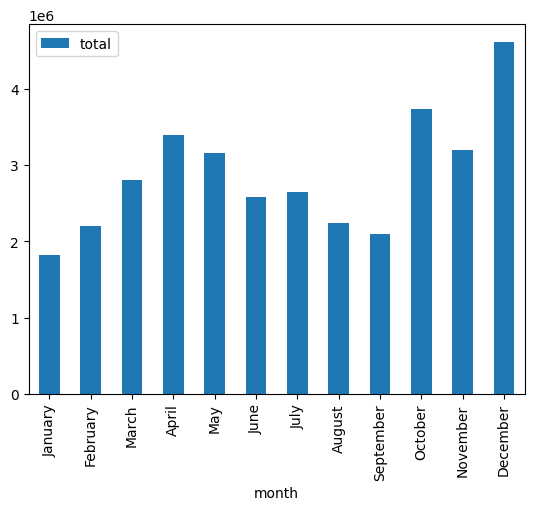

In [160]:
sales_by_month_df.loc[: , ['total']].plot( kind='bar')

In [ ]:
#### What City has highest number of sales

In [186]:
df['city'] = df['Purchase Address'].apply( lambda addr : addr.split(',')[1])

In [187]:
df['state'] = df['Purchase Address'].str.split(',').apply( lambda addr : addr [2]).str.split(' ').apply( lambda addr : addr[1])

In [188]:
df.groupby(['city' , 'state']).sum(['total']).sort_values('total' , ascending=False)

,,Quantity Ordered,Price Each,total
city,state,,,
San Francisco,CA,50239.0,8211461.74,8262203.91
Los Angeles,CA,33289.0,5421435.23,5452570.80
New York City,NY,27932.0,4635370.83,4664317.43
Boston,MA,22528.0,3637409.77,3661642.01
Atlanta,GA,16602.0,2779908.20,2795498.58
Dallas,TX,16730.0,2752627.82,2767975.40
Seattle,WA,16553.0,2733296.01,2747755.48
Portland,OR,11303.0,1860558.22,1870732.34
Austin,TX,11153.0,1809873.61,1819581.75


In [ ]:
### What time should we display advertisement to maximum likehood of customer's buying product 
### Based on time - hour

In [190]:
 df['order_hour'] =df['Order Date'].dt.hour

<Axes: xlabel='order_hour'>

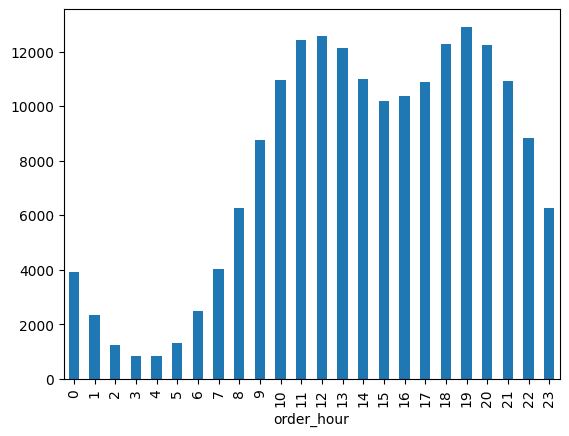

In [196]:
df.groupby('order_hour')['Order ID'].count().plot(kind='bar')

In [ ]:
### What are the products are most often sold together

In [198]:
df['Order ID'].value_counts()

Order ID
160873    5
312462    4
242936    4
235798    4
165665    4
         ..
201973    1
201974    1
201975    1
201976    1
319670    1
Name: count, Length: 178437, dtype: int64

In [ ]:
### Che3ck order ID for each item ,  then figure out a solution , maybe correlation or cluster

In [ ]:
#### What product is sold most

<Axes: xlabel='Product'>

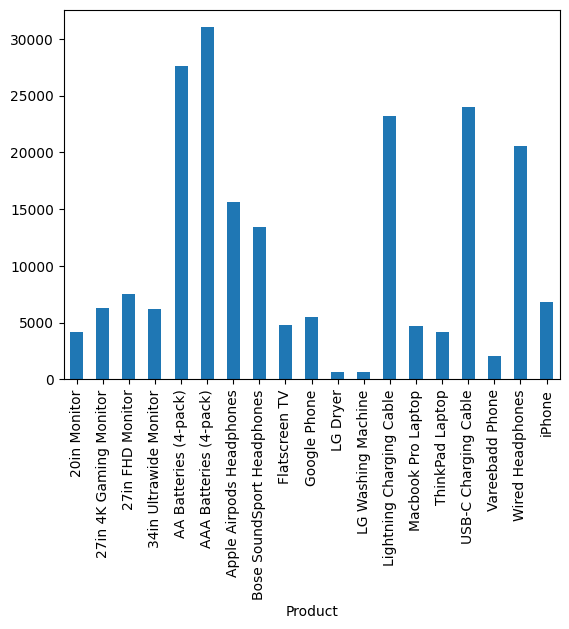

In [203]:
df.groupby('Product').sum('Quantity Ordered')['Quantity Ordered'].plot(kind = 'bar')